In [1]:
# Load the Drive helper and mount
from google.colab import drive
# This will prompt for authorization.
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
from pathlib import Path
pathMsk = Path("/content/drive/MyDrive/Colab_Notebooks/Tesi/Images/Image_Mask/I1221051")
pathImg = Path("/content/drive/MyDrive/Colab_Notebooks/Tesi/Images/Image_NiFTY/I1221051/I1221051.nii.gz")
slices = 80

In [3]:
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from torchvision.io import read_image

In [4]:
def show_anns(anns):
    if len(anns) == 0:
        return
    sorted_anns = anns
    ax = plt.gca()
    ax.set_autoscale_on(False)

    img = np.ones((sorted_anns[0].shape[0], sorted_anns[0].shape[1], 4))
    print(img.shape)
    img[:,:,3] = 0
    for ann in sorted_anns:
        m = ann
        color_mask = np.concatenate([np.random.random(3), [0.35]])
        print(color_mask)
        img[m] = color_mask
    ax.imshow(img)

In [5]:
nifti_path = str(pathImg)
nifti_image = nib.load(nifti_path)
data = nifti_image.get_fdata()
image = data[:, :, slices][:, :, np.newaxis]
# Espandi la terza dimensione copiando i valori
image = np.repeat(image, 3, axis=2)
#print(image.shape,image)
image = 255 - (255 * (image.max() - image) / (image.max() - image.min())).astype(np.uint8)

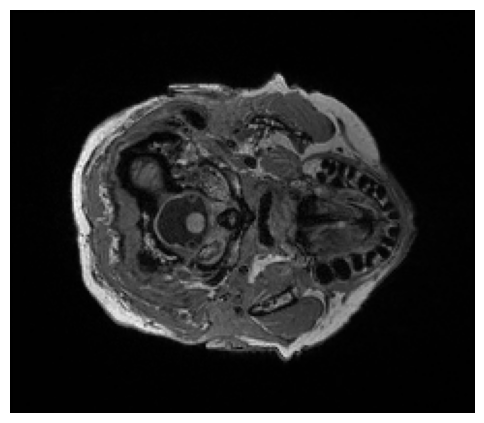

In [6]:
plt.figure(figsize=(6,6))
plt.imshow(image)
plt.axis('off')
plt.show()

In [7]:
def findMask(path, slices):
  paths = []
  mask = []
  for msk in path.iterdir():
    n_slice = str(msk).split("_")[-2].split("e")[1]
    if int(n_slice) == slices:
      paths.append(str(msk))
      #print(msk)

  print(len(paths))
  buffer = [None] *  len(paths)
  #print(len(buffer))
  for i in range(len(paths)):
    index = paths[i].split("_")[-1].split(".")[0]
    buffer[int(index)] = i

  final = []
  for i in range(len(buffer)):
    final.append(paths[buffer[i]])
  #print(final)
  for p in range(len(final)):
    #print(final[p])
    img = read_image(final[p])
    img = img.permute(1,2,0)
    img = img.numpy()
    #img = img.astype(bool)
    mask.append(img)
  return mask

In [8]:
masks = findMask(pathMsk, slices)

43


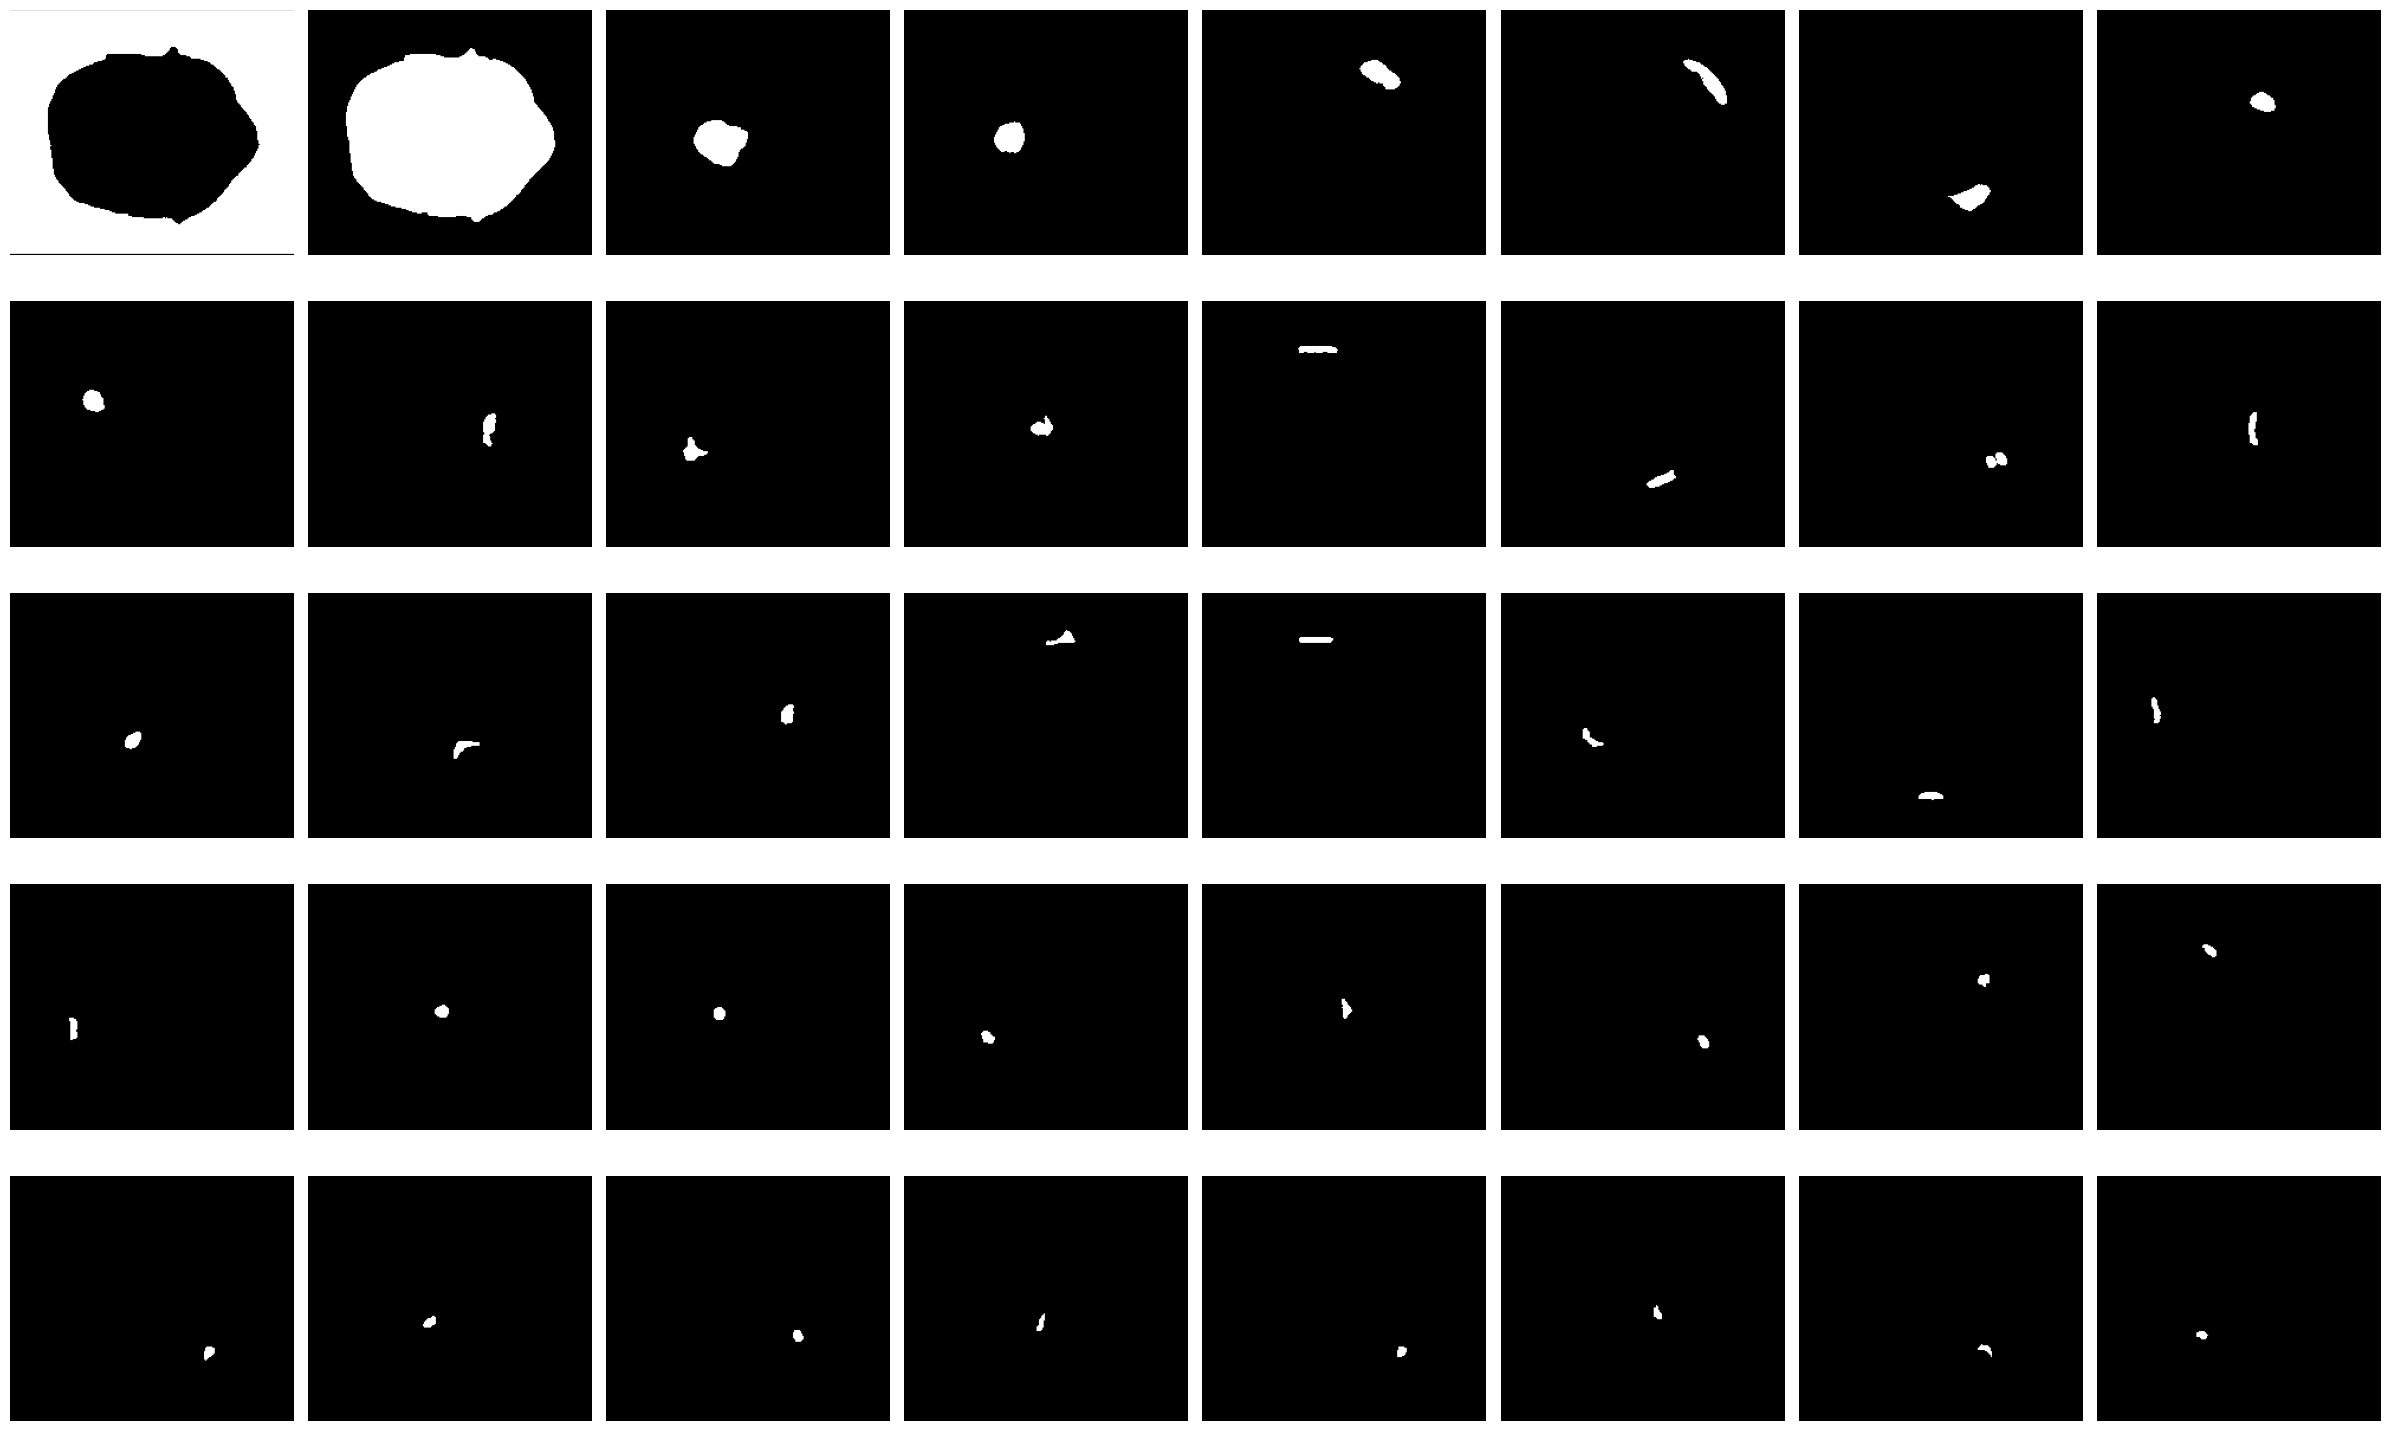

In [9]:
import matplotlib.pyplot as plt

def create_subplot(rows, cols):
    fig, axes = plt.subplots(rows, cols, figsize=(cols*3, rows*3))
    return fig, axes

# Esempio di utilizzo
rows = int((len(masks) / 8))
cols = 8
fig, axes = create_subplot(rows, cols)
z = 0
# Aggiungi le tue immagini ai subplot
for i in range(rows):
    for j in range(cols):
        # Supponiamo che "image_data" sia il tensore dell'immagine da visualizzare
        # Puoi sostituire "image_data" con i tuoi dati o immagini
        axes[i, j].imshow(masks[z], cmap='gray')
        z += 1
        axes[i, j].axis('off')

plt.tight_layout()  # Ottimizza gli spazi tra i subplot
plt.show()


In [10]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt

import torchvision.transforms.functional as F


ASSETS_DIRECTORY = "assets"

plt.rcParams["savefig.bbox"] = "tight"


def show(imgs):
    if not isinstance(imgs, list):
        imgs = [imgs]
    fix, axs = plt.subplots(nrows=len(imgs), squeeze=False, figsize = (208,240))
    for i, img in enumerate(imgs):
        img = img.detach()
        img = F.to_pil_image(img)
        axs[i, 0].imshow(np.asarray(img))
        axs[i, 0].set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

In [11]:
def findMask2(path, slices):
  paths = []
  mask = []
  for msk in path.iterdir():
    n_slice = str(msk).split("_")[-2].split("e")[1]
    if int(n_slice) == slices:
      paths.append(str(msk))
      #print(msk)

  print(len(paths))
  buffer = [None] *  len(paths)
  #print(len(buffer))
  for i in range(len(paths)):
    index = paths[i].split("_")[-1].split(".")[0]
    buffer[int(index)] = i

  final = []
  for i in range(len(buffer)):
    final.append(paths[buffer[i]])
  #print(final)
  for p in range(len(final)):
    #print(final[p])
    img = read_image(final[p])
    #img = img.permute(1,2,0)
    img = img.numpy()
    img = img.astype(bool)
    mask.append(torch.tensor(img))
  return mask

In [12]:
img = torch.tensor(image)
img = img.permute(2,0,1)
masks = findMask2(pathMsk, slices)

43


In [13]:
from torchvision.utils import draw_segmentation_masks

drawn_masks = []
for mask in masks:
    drawn_masks.append(draw_segmentation_masks(img, mask, alpha=0.8, colors="blue"))

show(drawn_masks)

Output hidden; open in https://colab.research.google.com to view.